## POINTS 1-3)

In [106]:
# Libraries du hase
#change1
import os
import sqlite3
import fnmatch
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from pstats import Stats
#from pstats import StatsProfile
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pylab as py

# Settings for seaborn
#sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [107]:
df = pd.read_csv('combined_loc.csv',
                 sep=',',
                 encoding='latin-1')

df


,date,brand,address,diesel_price,bleifrei_price,lat,lon
0,21.09.2020,Alpina Tankstelle,"Dorfstrasse 42, 7563 Samnaun Dorf",1.120,1.140,46.943104,10.358743
1,28.10.2022,Socar Gotthard,"A2 West, 6467 Schattdorf",2.395,2.035,47.228649,7.621632
2,14.08.2022,BP Rheintal,"Autobahn A13, 9470 Buchs SG",2.380,2.200,NaN,NaN
3,11.07.2022,eni - Castasegna Ovest,"Farzett, 7608 Castasegna",2.380,2.230,47.285664,8.563127
4,03.08.2022,BP,"GrÃ¼ningerstr. 80, 8624 GrÃ¼t (Gossau ZH)",2.370,2.220,47.448483,8.926337
...,...,...,...,...,...,...,...
2400,04.05.2016,Auto Bellinzona Nord Sagl,"Via S. Gottardo 57B, 6500 Bellinzona",1.320,1.330,NaN,NaN
2401,02.02.2016,Reisch AG,"Hauptstr. 24, 8573 Siegershausen",1.320,1.270,NaN,NaN
2402,04.05.2016,Auto Lugano,"Via Cantonale, 6983 Magliaso",1.319,1.279,NaN,NaN
2403,22.12.2020,Ruedi RÃ¼ssel,"Luzernstr. 60, 4553 Subingen",1.310,1.260,NaN,NaN


In [108]:
difference = []
for index, row in df.iterrows():
    difference.append(row['diesel_price'] - row['bleifrei_price'])

df['difference'] = difference

df

,date,brand,address,diesel_price,bleifrei_price,lat,lon,difference
0,21.09.2020,Alpina Tankstelle,"Dorfstrasse 42, 7563 Samnaun Dorf",1.120,1.140,46.943104,10.358743,-0.02
1,28.10.2022,Socar Gotthard,"A2 West, 6467 Schattdorf",2.395,2.035,47.228649,7.621632,0.36
2,14.08.2022,BP Rheintal,"Autobahn A13, 9470 Buchs SG",2.380,2.200,NaN,NaN,0.18
3,11.07.2022,eni - Castasegna Ovest,"Farzett, 7608 Castasegna",2.380,2.230,47.285664,8.563127,0.15
4,03.08.2022,BP,"GrÃ¼ningerstr. 80, 8624 GrÃ¼t (Gossau ZH)",2.370,2.220,47.448483,8.926337,0.15
...,...,...,...,...,...,...,...,...
2400,04.05.2016,Auto Bellinzona Nord Sagl,"Via S. Gottardo 57B, 6500 Bellinzona",1.320,1.330,NaN,NaN,-0.01
2401,02.02.2016,Reisch AG,"Hauptstr. 24, 8573 Siegershausen",1.320,1.270,NaN,NaN,0.05
2402,04.05.2016,Auto Lugano,"Via Cantonale, 6983 Magliaso",1.319,1.279,NaN,NaN,0.04
2403,22.12.2020,Ruedi RÃ¼ssel,"Luzernstr. 60, 4553 Subingen",1.310,1.260,NaN,NaN,0.05


In [109]:
###EDA part2

In [110]:
df.describe()

,diesel_price,bleifrei_price,lat,lon,difference
count,2405.000000,2405.000000,1758.000000,1758.000000,2405.000000
mean,1.823983,1.682839,47.079539,8.346109,0.141144
std,0.284428,0.218636,0.453669,0.793163,0.103989
min,1.120000,1.140000,45.833527,5.971094,-0.140000
25%,1.570000,1.500000,46.894756,7.708704,0.060000
50%,1.770000,1.679000,47.200623,8.451691,0.100000
75%,2.090000,1.840000,47.418551,8.930103,0.200000
max,2.395000,2.230000,47.792210,10.455905,0.500000


In [111]:
# Preis Diesel
print('Preis:',
      'Count:', round(df.diesel_price.count(), 1),
      'Min:', round(df.diesel_price.min(), 1),
      'Max:', round(df.diesel_price.max(), 1),
      'Mean:', round(df.diesel_price.mean(), 1),
      'Median:', round(df.diesel_price.median(), 1),
      'Std:', round(df.diesel_price.std(), 1))

# Preis Bleifrei
print('Preis2:',
      'Count:', round(df.bleifrei_price.count(), 1),
      'Min:', round(df.bleifrei_price.min(), 1),
      'Max:', round(df.bleifrei_price.max(), 1),
      'Mean:', round(df.bleifrei_price.mean(), 1),
      'Median:', round(df.bleifrei_price.median(), 1),
      'Std:', round(df.bleifrei_price.std(), 1))

Preis: Count: 2405 Min: 1.1 Max: 2.4 Mean: 1.8 Median: 1.8 Std: 0.3
Preis2: Count: 2405 Min: 1.1 Max: 2.2 Mean: 1.7 Median: 1.7 Std: 0.2


In [112]:
df.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,diesel_price,bleifrei_price,lat,lon,difference
0.05,1.42,1.35,46.08,7.05,0.02
0.10,1.47,1.40,46.30,7.23,0.04
0.25,1.57,1.50,46.89,7.71,0.06
0.50,1.77,1.68,47.20,8.45,0.10
0.75,2.09,1.84,47.42,8.93,0.20
0.90,2.22,1.97,47.52,9.35,0.30
0.95,2.26,2.06,47.58,9.53,0.33


In [113]:
df.skew()

diesel_price      0.186197
bleifrei_price    0.230646
lat              -1.080079
lon              -0.236523
difference        0.804669
dtype: float64

In [114]:
df.kurtosis()

diesel_price     -1.249877
bleifrei_price   -0.650090
lat               0.321989
lon              -0.470587
difference       -0.525828
dtype: float64

In [115]:
# low diffrenc | difference on the otherside
df[df.difference <= -0.03].head()


,date,brand,address,diesel_price,bleifrei_price,lat,lon,difference
893,25.06.2022,Alpha Petrol,"Talstrasse 80, 7563 Samnaun Dorf",1.83,1.91,47.364643,9.041173,-0.08
894,25.06.2022,Alpha Petrol,"Talstrasse 80, 7563 Samnaun Dorf",1.83,1.86,NaN,NaN,-0.03
2032,06.04.2020,Tamoil,"DÃ¼bendorferstr. 123, 8051 ZÃ¼rich",1.50,1.64,47.443989,9.532334,-0.14
2155,06.08.2015,Socar Sarnen,"GÃ¼terstr. 1a, 6060 Sarnen",1.47,1.53,47.416435,9.311487,-0.06
2215,17.09.2017,Avia,"Oltnerstr. 62, 5012 SchÃ¶nenwerd",1.45,1.48,47.297844,8.598439,-0.03


In [116]:
# high difference
df[df.difference >= 0.41].head()

,date,brand,address,diesel_price,bleifrei_price,lat,lon,difference
6,28.10.2022,Avia,"KÃ¶lliken SÃ¼d / A1, 5742 KÃ¶lliken",2.370,1.960,46.858021,8.642415,0.41
30,16.10.2022,Opel Krapf AG,"Buorcha, 7530 Zernez",2.330,1.850,47.420074,8.846083,0.48
65,26.10.2022,Gustoil,"Route principale, 2830 Courrendlin",2.299,1.799,47.329006,9.084676,0.50
75,31.10.2022,Garage Rainalter,"Via Maistra 60, 7542 Susch",2.290,1.860,NaN,NaN,0.43
185,26.10.2022,Eni,"Baselstr. 22, 4202 Duggingen",2.240,1.830,47.255661,7.818877,0.41


## 4) EDA Part

In [117]:
df.describe()

,diesel_price,bleifrei_price,lat,lon,difference
count,2405.000000,2405.000000,1758.000000,1758.000000,2405.000000
mean,1.823983,1.682839,47.079539,8.346109,0.141144
std,0.284428,0.218636,0.453669,0.793163,0.103989
min,1.120000,1.140000,45.833527,5.971094,-0.140000
25%,1.570000,1.500000,46.894756,7.708704,0.060000
50%,1.770000,1.679000,47.200623,8.451691,0.100000
75%,2.090000,1.840000,47.418551,8.930103,0.200000
max,2.395000,2.230000,47.792210,10.455905,0.500000


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [118]:
# Preis Diesel
print('Preis:',
      'Count:', round(df.diesel_price.count(), 1),
      'Min:', round(df.diesel_price.min(), 1),
      'Max:', round(df.diesel_price.max(), 1),
      'Mean:', round(df.diesel_price.mean(), 1),
      'Median:', round(df.diesel_price.median(), 1),
      'Std:', round(df.diesel_price.std(), 1))

# Preis Bleifrei
print('Preis2:',
      'Count:', round(df.bleifrei_price.count(), 1),
      'Min:', round(df.bleifrei_price.min(), 1),
      'Max:', round(df.bleifrei_price.max(), 1),
      'Mean:', round(df.bleifrei_price.mean(), 1),
      'Median:', round(df.bleifrei_price.median(), 1),
      'Std:', round(df.bleifrei_price.std(), 1))

# Datum
print('Datum:',
      'Count:', round(df.lat.count(), 1),
      'Min:', round(df.lat.min(), 1),
      'Max:', round(df.lat.max(), 1),
      'Mean:', round(df.lat.mean(), 1),
      'Median:', round(df.lat.median(), 1),
      'Std:', round(df.lat.std(), 1))

Preis: Count: 2405 Min: 1.1 Max: 2.4 Mean: 1.8 Median: 1.8 Std: 0.3
Preis2: Count: 2405 Min: 1.1 Max: 2.2 Mean: 1.7 Median: 1.7 Std: 0.2
Datum: Count: 1758 Min: 45.8 Max: 47.8 Mean: 47.1 Median: 47.2 Std: 0.5


In [119]:
# Quantiles
df.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

# Skewness
df.skew()

#Kurtosis
df.kurtosis()

diesel_price     -1.249877
bleifrei_price   -0.650090
lat               0.321989
lon              -0.470587
difference       -0.525828
dtype: float64

### Multivariate non-graphical exploratory data analysis (EDA)

In [120]:
#Cross- tabulation
pd.crosstab(df['bleifrei_price'], df['diesel_price'])

diesel_price,1.120,1.300,1.310,1.319,1.320,1.330,1.340,1.350,1.355,1.360,...,2.340,2.345,2.349,2.350,2.359,2.360,2.369,2.370,2.380,2.395
bleifrei_price,,,,,,,,,,,,,,,,,,,,,
1.140,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.250,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1.260,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.270,0,0,0,0,1,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1.275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [121]:
""" #Pivot table
pd.pivot_table(df[['bleifrei_price', 'diesel_price', 'bleifrei_price', 'diesel_price']],
               index=['bleifrei_price'],
               values=['bleifrei_price', 'diesel_price', 'bleifrei_price'],
               aggfunc=np.mean) """

" #Pivot table\npd.pivot_table(df[['bleifrei_price', 'diesel_price', 'bleifrei_price', 'diesel_price']],\n               index=['bleifrei_price'],\n               values=['bleifrei_price', 'diesel_price', 'bleifrei_price'],\n               aggfunc=np.mean) "

In [122]:
#Correlation matrix
corr = df.corr()
corr

#Covariance matrix
cov = df.cov()
cov

,diesel_price,bleifrei_price,lat,lon,difference
diesel_price,0.080900,0.058944,-0.017670,0.021066,0.021956
bleifrei_price,0.058944,0.047802,-0.011912,0.017131,0.011142
lat,-0.017670,-0.011912,0.205815,0.046613,-0.005758
lon,0.021066,0.017131,0.046613,0.629108,0.003934
difference,0.021956,0.011142,-0.005758,0.003934,0.010814


### Univariate graphical exploratory data analysis (EDA)

<AxesSubplot:xlabel='bleifrei_price'>

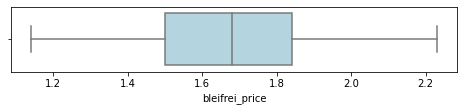

In [123]:
# Boxplot
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['bleifrei_price'], color="lightblue")

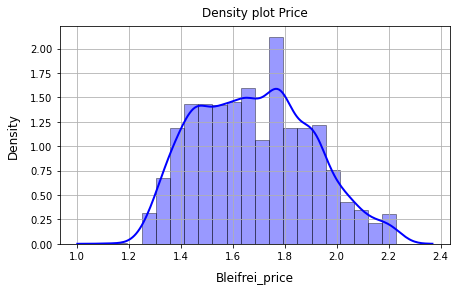

In [124]:
# Density plot
plt.figure(figsize=(7,4))
sns.distplot(df['bleifrei_price'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot Price', fontsize=12, pad=10)
plt.xlabel('Bleifrei_price', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

In [125]:
#Quantile-Quantile-Plot
"""
df_qq = df
df_qq['km'] = (df['price']-df['price'].mean()) / df['price'].std()
print(df_qq.sort_values('km')[['price', 'km']])
    
# Plot
sm.qqplot(df_qq['km'], line ='45', color = 'lightblue')
py.show() """

"\ndf_qq = df\ndf_qq['km'] = (df['price']-df['price'].mean()) / df['price'].std()\nprint(df_qq.sort_values('km')[['price', 'km']])\n    \n# Plot\nsm.qqplot(df_qq['km'], line ='45', color = 'lightblue')\npy.show() "

In [126]:
# Barchart
"""
df_bar = df['users'].value_counts().nlargest(12).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos)
ax.set_xlabel('Number of cars', fontsize=10)
ax.set_ylabel('Users', fontsize=10)

# Show graph
plt.show()
"""

"\ndf_bar = df['users'].value_counts().nlargest(12).sort_values(ascending=True)\n\n# Values for barchart\nnapart = list(df_bar.values)\nindex = list(df_bar.index.values)\ny_pos = np.arange(len(index))\n\n# Figure\nfig, ax = plt.subplots(figsize=(7,4))\nax.barh(y_pos, napart, align='center', color='g', alpha=0.8)\nax.set_yticks(y_pos)\nax.set_xlabel('Number of cars', fontsize=10)\nax.set_ylabel('Users', fontsize=10)\n\n# Show graph\nplt.show()\n"

### Multivariate graphical exploratory data analysis (EDA)

In [127]:
# Scatterplot with linear regression
"""
plt.figure(figsize=(7,4))
plt.plot(df[['price',
             'consumption']], 
            'o', 
            markersize=3.5,
            color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df['price'], df['consumption'], 1)
print(b)
print(a)

# Plot regression line
plt.plot(df['price'], 
         b*df['price'] + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('consumption', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()
"""

'\nplt.figure(figsize=(7,4))\nplt.plot(df[[\'price\',\n             \'consumption\']], \n            \'o\', \n            markersize=3.5,\n            color="green")\n\n# Regression line (b = slope, a=intercept)\nb, a = np.polyfit(df[\'price\'], df[\'consumption\'], 1)\nprint(b)\nprint(a)\n\n# Plot regression line\nplt.plot(df[\'price\'], \n         b*df[\'price\'] + a, \n         linewidth=1,\n         linestyle=\'dashed\',\n         color=\'darkred\')\n\n# Add title and axes labels\nplt.title(\'Scatterplot with regression line\', fontsize=12)\nplt.ylabel(\'price\', fontsize=12)\nplt.xlabel(\'consumption\', fontsize=12)\n\n# Set fontsize of tick labels\nplt.xticks(fontsize = 10)\nplt.yticks(fontsize = 10)\n\nplt.show()\n'

## 5) Regression

### Simple linear regression (only one explanatory variable in the model) KM ODER Price

In [128]:
df

,date,brand,address,diesel_price,bleifrei_price,lat,lon,difference
0,21.09.2020,Alpina Tankstelle,"Dorfstrasse 42, 7563 Samnaun Dorf",1.120,1.140,46.943104,10.358743,-0.02
1,28.10.2022,Socar Gotthard,"A2 West, 6467 Schattdorf",2.395,2.035,47.228649,7.621632,0.36
2,14.08.2022,BP Rheintal,"Autobahn A13, 9470 Buchs SG",2.380,2.200,NaN,NaN,0.18
3,11.07.2022,eni - Castasegna Ovest,"Farzett, 7608 Castasegna",2.380,2.230,47.285664,8.563127,0.15
4,03.08.2022,BP,"GrÃ¼ningerstr. 80, 8624 GrÃ¼t (Gossau ZH)",2.370,2.220,47.448483,8.926337,0.15
...,...,...,...,...,...,...,...,...
2400,04.05.2016,Auto Bellinzona Nord Sagl,"Via S. Gottardo 57B, 6500 Bellinzona",1.320,1.330,NaN,NaN,-0.01
2401,02.02.2016,Reisch AG,"Hauptstr. 24, 8573 Siegershausen",1.320,1.270,NaN,NaN,0.05
2402,04.05.2016,Auto Lugano,"Via Cantonale, 6983 Magliaso",1.319,1.279,NaN,NaN,0.04
2403,22.12.2020,Ruedi RÃ¼ssel,"Luzernstr. 60, 4553 Subingen",1.310,1.260,NaN,NaN,0.05


In [129]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['bleifrei_price'], 
                                                    df['diesel_price'], 
                                                    test_size=0.5, 
                                                    random_state=30)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
1793    1.54
2307    1.36
1738    1.55
1178    1.67
2379    1.32
Name: bleifrei_price, dtype: float64 

y_train:
1793    1.58
2307    1.41
1738    1.60
1178    1.78
2379    1.36
Name: diesel_price, dtype: float64


In [130]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            -0.26
Slope of regression line (beta):          1.239
p-value:                                  0.0000
R-squared (coefficient of determination): 0.8967


### Plot regression line

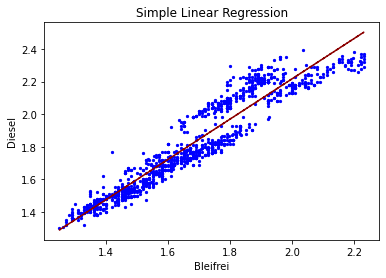

In [131]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept


# Apply myfunc() to x, i.e. make predictions
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, s=5, color='blue')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('Bleifrei')
plt.ylabel('Diesel')

plt.show()


### Check model residuals (residuals = predicted values minus observed val

In [132]:
# Calculate residuals (here: predicted prices minus observed prices)
"""residuals = mymodel - y_train

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}') """

"residuals = mymodel - y_train\n\n# Check the first residual value in our data set\nprint(f'1st Predicted price in dataset: {mymodel[0]:.2f}')\nprint(f'1st Observed price in dataset: {y_train[0]:.2f}')\nprint(f'1st Residual price in dataset: {residuals[0]:.2f}') "

## 6 & 7) Measures of fit and interpretation

For Interpretation of our simple linear regression we use the R-squared value, which should be near 1 if the model should have a high goodness of fit, and the RMSE-value, which indicates how much the model predictions differ onn average from the observed values.
Additionally we plot the Histogram of the residuals, with which we can visualize the differencees between the model values and the actual values. 

In [133]:
#R^2
print(f'R-squared (coefficient of determination): {r**2:.4f}')

R-squared (coefficient of determination): 0.8967


In [134]:
#RMSE
MSE = np.square(np.subtract(y_train, mymodel)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

0.40528540593762613


In [135]:
#Histogram of residuals
fig = plt.figure(figsize=(25, 4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=1000, 
                            color='black',
                            alpha=0.6
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Add text annotation
plt.text(-50, 50, s="--", 
         fontsize=11, 
         color="black")

# Show plot
plt.show()


#Interpretation:
R-squared: the value is in the bottom half between 0 and 1, which means the model has a high goodness-of-fit.
RMSE: The value is very high with 70'000 euro differencee in average between the predicted value and the observed value.
Histogram of model residuals: As visualized in the histogram of model residual, it is left-skewed. That is because we have much higher price differencees, the higher we go price-wise.

### ANOVA Analysis

H0: the means of the car prices per brand are the same;  
H1: the means of the car prices per brand are not the same   
--> compared will be the three brands: Ferrari, Lamborghini and McLaren

In [136]:
#defining dataframe and remove outliers
df_anova = df[['bleifrei_price', 'diesel_price']]
threshold = 400000
df_anova = df_anova[df_anova['diesel_price'] < threshold]
df_anova.head()

,bleifrei_price,diesel_price
0,1.140,1.120
1,2.035,2.395
2,2.200,2.380
3,2.230,2.380
4,2.220,2.370


In [137]:
#pivot-table
"""
table = pd.pivot_table(df_anova, 
                       values='bleifrei_price',
                       columns=['date'], 
                       aggfunc=np.mean)
print(table)"""

"\ntable = pd.pivot_table(df_anova, \n                       values='bleifrei_price',\n                       columns=['date'], \n                       aggfunc=np.mean)\nprint(table)"

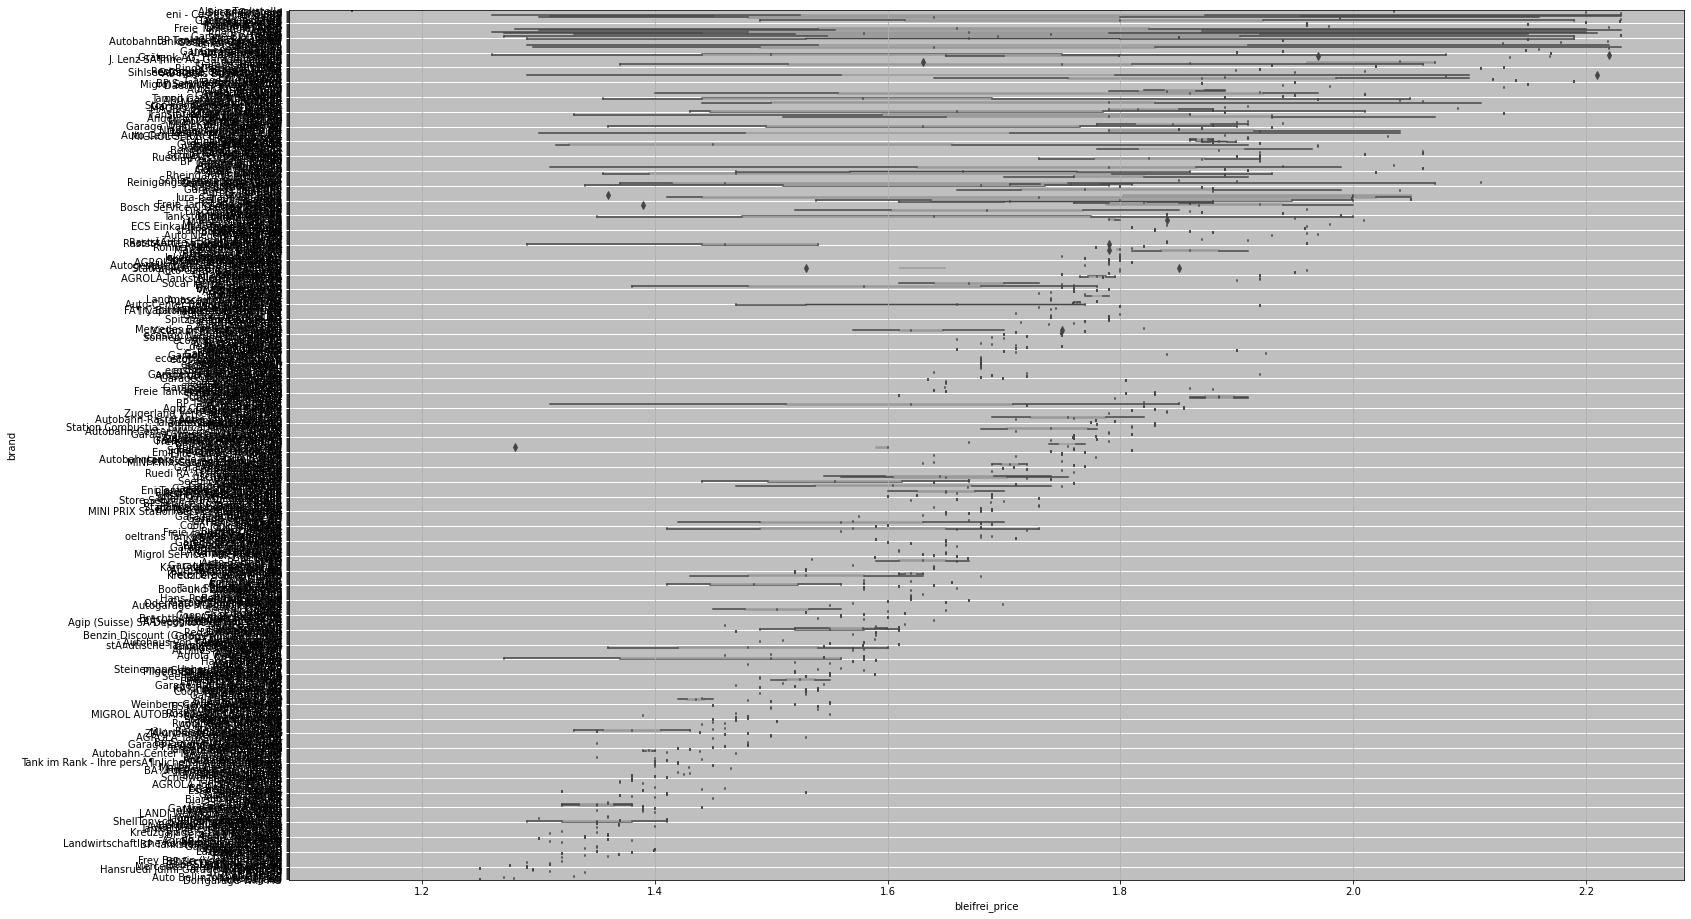

In [138]:
#Boxplots
plt.figure(figsize=(25, 16))
ax = sns.boxplot(x="bleifrei_price",
                 y="brand",
                 data=df,
                 orient='h')
plt.grid()
plt.show()

In [139]:
# Create subsets (groups)
"""
rMcLaren = df_anova.loc[df_anova['brand'] == 'McLaren']['price (euro)']
rFerrari = df_anova.loc[df_anova['brand'] == 'Ferrari']['price (euro)']
rLamborghini = df_anova.loc[df_anova['brand'] == 'Lamborghini']['price (euro)']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(rFerrari, rLamborghini)

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))
"""

"\nrMcLaren = df_anova.loc[df_anova['brand'] == 'McLaren']['price (euro)']\nrFerrari = df_anova.loc[df_anova['brand'] == 'Ferrari']['price (euro)']\nrLamborghini = df_anova.loc[df_anova['brand'] == 'Lamborghini']['price (euro)']\n\n# Create ANOVA\nfvalue, pvalue = stats.f_oneway(rFerrari, rLamborghini)\n\n# Print results\nprint('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))\n"

In [140]:
###Anova Test 2

In [141]:
count_avia=0
count_agrola=0
count_shell=0

for i in df['brand']:
    if "Avia" in i:
        count_avia = count_avia + 1
    if "Agrola" in i:
        count_agrola = count_agrola + 1
    if "Shell" in i:
        count_shell = count_shell + 1
    
print(count_avia)
print(count_agrola)
print(count_shell)

259
151
142


In [142]:
avia = df.loc[df['brand'].str.contains('Avia')]
agrola = df.loc[df['brand'].str.contains('Agrola')]
shell = df.loc[df['brand'].str.contains('Shell')]

print(avia.shape)
print(agrola.shape)
print(shell.shape)

# Create ANOVA
fvalue, pvalue = stats.f_oneway(avia['difference'],
                                agrola['difference'], 
                                shell['difference'])

print()

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

(259, 8)
(151, 8)
(142, 8)

F-value: 0.813 p-value 0.4442


In [143]:
avia_new = avia[['difference']].assign(brand="avia")
agrola_new = agrola[['difference']].assign(brand="agrola")
shell_new = shell[['difference']].assign(brand="shell")

boxplot = pd.concat([avia_new,agrola_new,shell_new])

boxplot

,difference,brand
6,0.41,avia
8,0.20,avia
27,0.18,avia
86,0.21,avia
103,0.38,avia
...,...,...
2354,0.07,shell
2360,0.01,shell
2361,0.06,shell
2363,0.10,shell


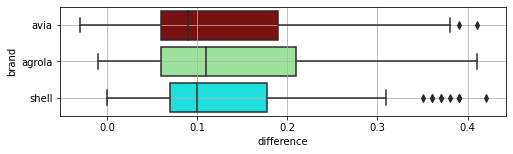

In [144]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="difference",
                 y="brand",
                 palette=['darkred', 'lightgreen', 'cyan'],
                 data=boxplot,
                 orient='h')
plt.grid()
plt.show()

In [145]:
### die nullhypothes kann nicht abgelehnt werden, dies weisst darfau hin das die Preisunterschiede zwischen Benzin und Diesel bei allen Marken gleich sind.

In [146]:
###k-means Clustering

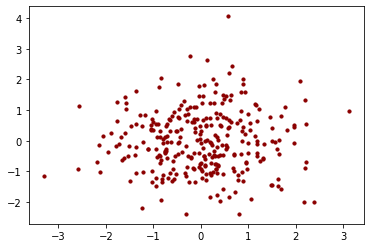

In [147]:
df_k = df.filter(['diesel_price','bleifrei_price'],axis=1)

X, y = make_blobs(n_samples=300, 
                  centers=df_k, 
                  cluster_std=0.8,
                  random_state=42)

# Normalization of the values
X = StandardScaler().fit_transform(X)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], s=10, color='darkred')
plt.show()

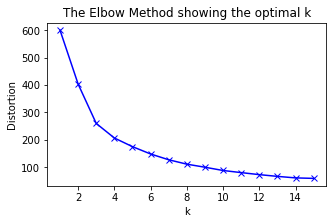

In [148]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,16,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

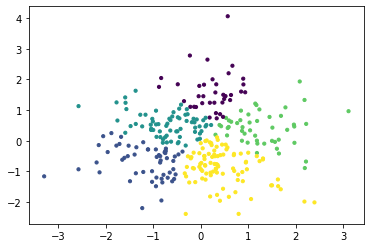

In [149]:
# Number of clusters
k = 5

# k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Predict the values
y2 = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y2, s=10)
plt.show()

In [150]:
# Print centroids
centroids = kmeans.cluster_centers_
print('Cluster centroids:')
print(centroids, '\n')

# Check the 1st cluster's centroid 'by hand'
clust_00 = X[y2 == 0]
print('The 1st cluster\'s centroid:')
print(f'x = {sum(clust_00[:,0]/len(clust_00[:,0])):.8f}')
print(f'y = {sum(clust_00[:,1]/len(clust_00[:,1])):.8f}')

Cluster centroids:
[[ 0.2336153   1.60925834]
 [-1.18207595 -0.70018609]
 [-0.68703477  0.54104074]
 [ 1.28285495  0.41086011]
 [ 0.44583365 -0.85636528]] 

The 1st cluster's centroid:
x = 0.23361530
y = 1.60925834


In [151]:
print(f'Within-cluster sum-of-squares: {kmeans.inertia_:.4f}')

Within-cluster sum-of-squares: 174.6127


In [152]:
def show_silhouette(X, fitted_model):

    import numpy as np
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(fitted_model.labels_)
    num_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, fitted_model.labels_)

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for idx, cls in enumerate(cluster_labels):
        cls_silhouette_vals = silhouette_vals[fitted_model.labels_==cls]
        cls_silhouette_vals.sort()
        y_ax_upper += len(cls_silhouette_vals)
        cmap = cm.get_cmap("Spectral")
        rgba = list(cmap(idx/num_clusters))
        rgba[-1] = 0.7
        plt.barh(
            y=range(y_ax_lower, y_ax_upper), 
            width=cls_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=rgba)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.0)
        y_ax_lower += len(cls_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='orangered', linestyle='--')
    plt.xlabel('silhouette score')
    plt.ylabel('cluster')
    plt.yticks(y_ticks, cluster_labels + 1)
    plt.xlim([0,1])
    plt.show()

k=2, Silhouette Score: 0.3174


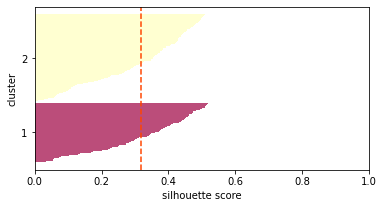

k=3, Silhouette Score: 0.3588


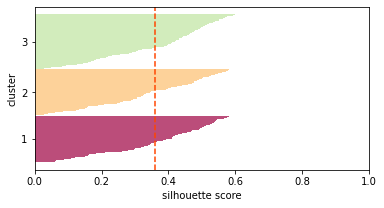

In [153]:

# Create Silhouette plots for different k's
# Note: range(2,12,1) provides: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in [2,3]:
    model = KMeans(n_clusters=i, 
                   random_state=42, 
                   init='random')
    model.fit(X)
    print(f'k={i}, Silhouette Score: {silhouette_score(X, model.labels_):.4f}')
    plt.figure(figsize=(6,3))
    show_silhouette(X=X, fitted_model=model)

